In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
X = pd.read_csv('./training_data/Linear_X_Train.csv').values
y = pd.read_csv('./training_data/Linear_Y_Train.csv').values.reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


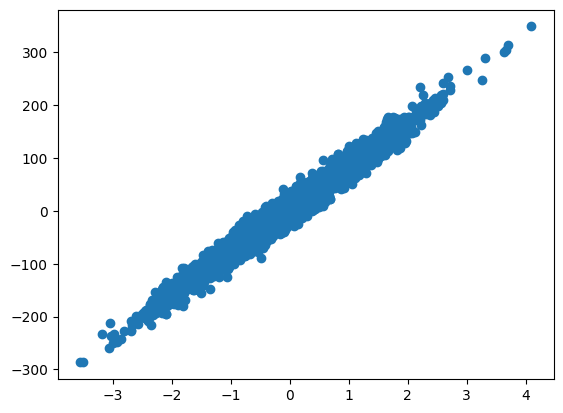

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
def hypothesis(x,w,w0):
    # yp = []
    # for i in range(x.shape[0]):
    #     y = w0 + np.sum(w*x[i])
    #     # for j in range(x.shape[1]):
    #     #     y += w[j]*x[i,j]
    #     yp.append(y)
    # return yp

    # return np.sum(w*x,axis = 1)+w0\
    return w@x.T+w0

In [7]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

array([ 4,  7, 10, 13])

In [8]:
w = [2]
w0 = 1

In [9]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [10]:
loss(X,w,w0,y)

np.float64(6262.785551671269)

In [11]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.zeros(shape=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        # for j in range(X.shape[1]):
        #     grad.append((yp-y)@X[:,j]/X.shape[0])

        grads = np.mean((ypred-y)*X.T,axis =1)
        w = w - lr*grads
        w0 = w0 - lr*np.mean(ypred-y)
    return w,w0

In [12]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)

In [13]:
w

array([80.54363185])

In [14]:
w0

np.float64(3.727988284452725)

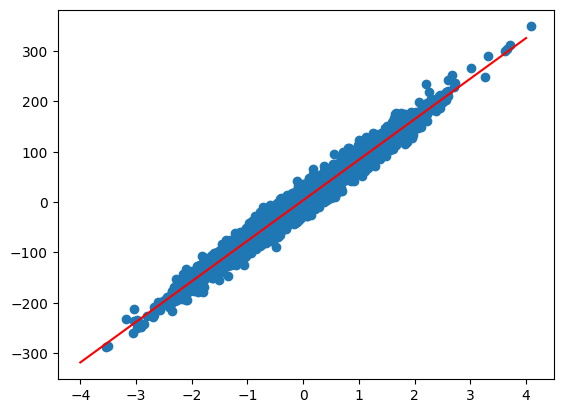

In [15]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [30]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        # w = np.zeros(shape=(X.shape[1],))
        # w[0] = 77
        # w0 = -3
        # self.loss_e = [self.loss(X,w,w0,y)]
        # self.th1 = [w[0]]
        # self.th0 = [w0]
        # for e in range(epochs):
        #     ypred = self.hypothesis(X,w,w0)
        #     i = np.random.randint(X.shape[0])
        #     # grads = np.mean((ypred-y)*X.T,axis =1)
        #     grads = (ypred[i]-y[i])*X[i]
        #     w = w - lr*grads
        #     w0 = w0 - lr*np.mean(ypred-y)
        #     self.th1.append(w[0])
        #     self.th0.append(w0)

        #     self.loss_e.append(self.loss(X,w,w0,y))
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.th1 = [w[0]]
        self.th0 = [w0]
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            
            # i = np.random.randint(X.shape[0])
            # grads = (ypred[i]-y[i])*X[i]
            
            grads = grads = (ypred-y)@X/X.shape[0]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
        return w,w0

In [31]:
clf = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [32]:
clf.fit(x_train,y_train,epochs=10000)

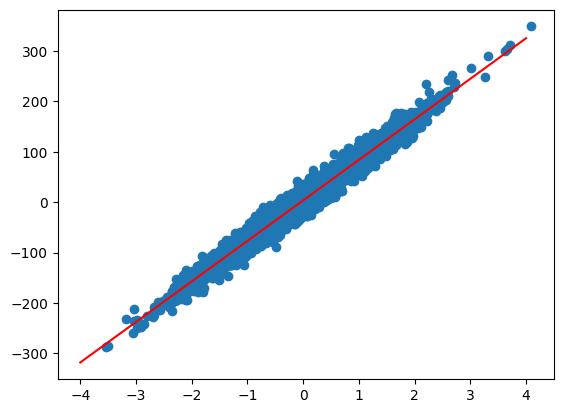

In [33]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,clf.predict(x),c='r')
plt.show()

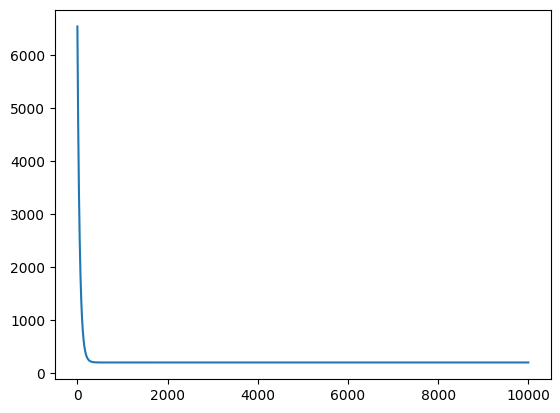

In [34]:
plt.plot(clf.loss_e)
plt.show()

In [35]:
r2_score(y_test,clf.predict(x_test))

0.9727533416208713

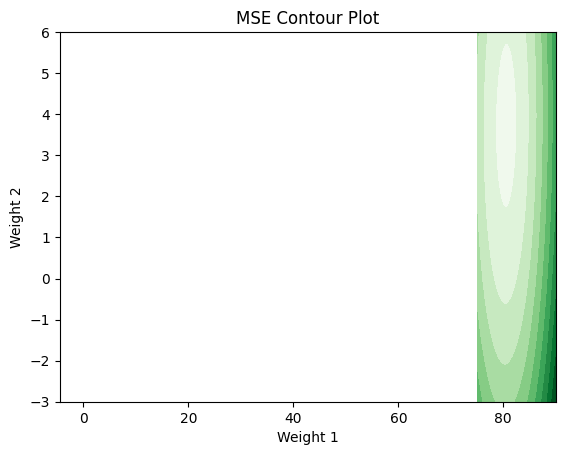

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume you have your data (X, y) and a trained linear regression model with weights 'w1' and 'w2' 
Xs = np.column_stack((X,np.ones_like(X)))
# Generate a grid of possible weights
w1_range = np.linspace(75, 90, 50)
w2_range = np.linspace(-3, 6, 50)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)

# Calculate MSE for each weight combination
mse_grid = np.zeros_like(w1_grid)
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        w1_test, w2_test = w1_grid[i, j], w2_grid[i, j]
        predicted = np.dot(Xs, [w1_test, w2_test])
        mse_grid[i, j] = mean_squared_error(y, predicted) 

# Create contour plot
plt.contourf(w1_grid, w2_grid, mse_grid, levels=10,cmap = 'Greens')
plt.plot(clf.th1,clf.th0)

plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("MSE Contour Plot")
plt.show()

In [37]:
clf.th1

[np.float64(0.0)]

In [38]:
X = np.hstack([np.ones((X.shape[0],1)),X])

In [39]:
X

array([[ 1.        , -0.28930742],
       [ 1.        , -0.58880963],
       [ 1.        ,  1.02750749],
       ...,
       [ 1.        , -0.30516366],
       [ 1.        ,  1.67583291],
       [ 1.        , -0.49175724]], shape=(3750, 2))

In [40]:
w = np.linalg.inv(X.T@X)@X.T@y

In [41]:
w

array([ 3.72798828, 80.54363185])

In [42]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [43]:
clf = LinearRegression()
clf.fit(X,y)

In [44]:
clf.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [45]:
clf.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'